**Демо-экзамен по курсу "Машинное обучение"**

Выполнил: *Майорова Анна Вячеславовна*

Филиал: *НИЯУ МИФИ*

 *Вставьте ниже скриншот из личного кабинета Иннополиса с результатами прохождения итогового асессмента (https://auth.unionepro.ru/login?redirect=https%3A%2F%2Fassessment.unionepro.ru%2F)*

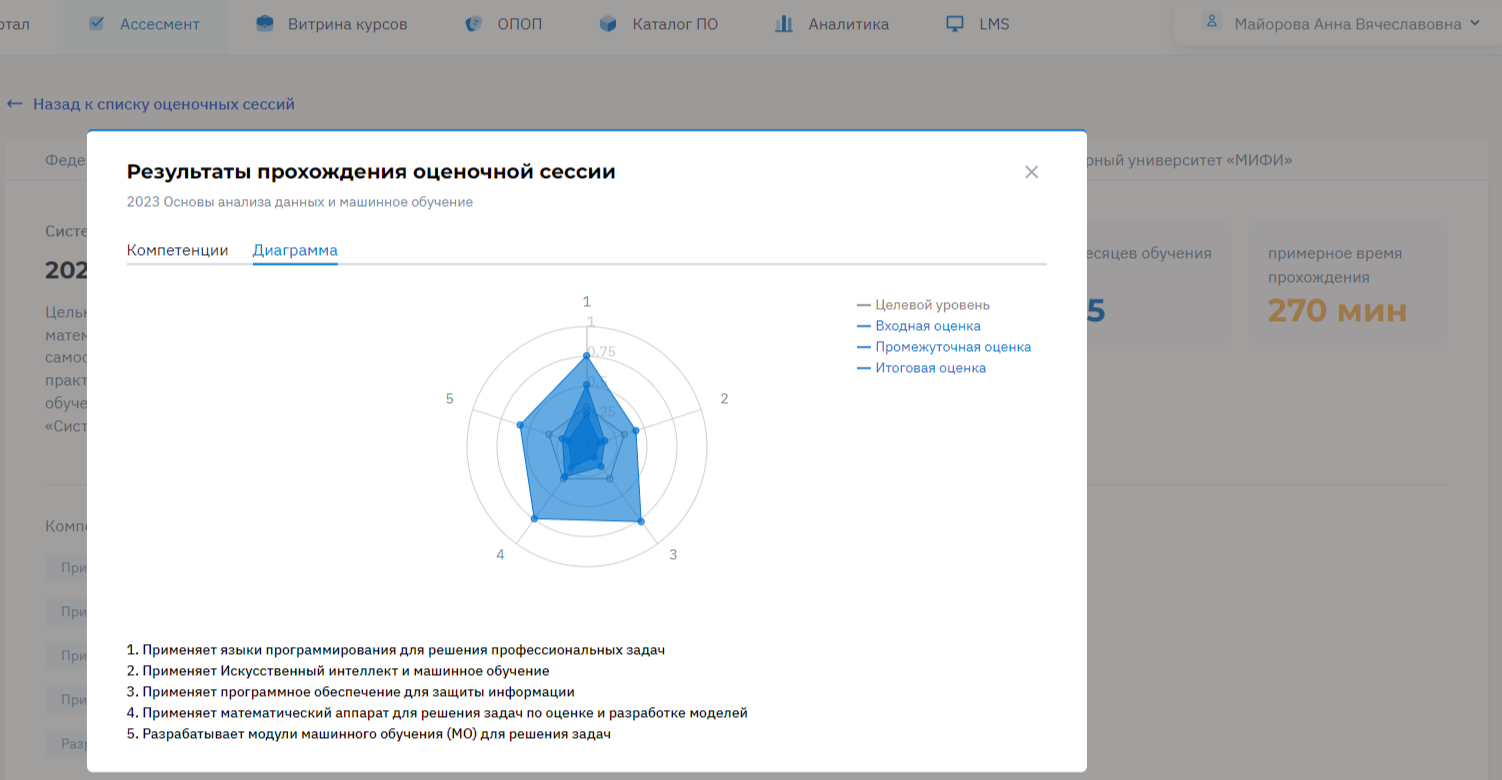

---
# 1. Исходные данные

### 1.1 Загрузка библиотек и данных


*Загрузить данные в соответствии с вариантом задания*

In [ ]:
# Load data

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()


In [ ]:
# Import libraries
# TODO

### 1.2 Описание исходных данных


*Привести описание исходных данных, описание и типы признаков (вещественные, целочисленные, категориальные и т.д.), объём выборки, особенности данных. Сформулировать решаемую задачу, определить тип задачи (регрессия / классификация), указать входные и выходные переменные.*

Набор данных состоит из измерений, собранных с помощью цифровой визуализации для анализа клеточных ядер опухолей. Целью исследования является классификация опухолей как доброкачественных или злокачественных на основе различных физических характеристик.

Назначение набора данных: Задача состоит в том, чтобы предсказать, является ли опухоль злокачественной (1) или доброкачественной (0), исходя из набора признаков.

В наборе данных имеется 30 признаков, которые характеризуют клетки опухоли на основе медицинских изображений. Все признаки являются вещественными числами (тип float).

Основные признаки можно разделить на несколько групп:

Радиус (mean radius): Средний радиус ядра опухоли.    
Текстура (mean texture): Вариации в яркости изображения.   
Периметр (mean perimeter): Длина границы клетки.   
Площадь (mean area): Площадь ядер опухолей.   
Гладкость (mean smoothness): Вариации в гладкости ядер опухолей.   
Компактность (mean compactness): Соотношение периметра к площади.   
Вогнутость (mean concavity): Углубления в границе опухоли.   
Симметрия (mean symmetry): Степень симметрии ядер.    
Фрактальная размерность (mean fractal dimension): Степень фрактальности границ.    
Каждый признак измеряется для трёх типов характеристик:    

Среднее значение.    
Стандартное отклонение.    
Худшие (максимальные) значения.    
Итого: 30 вещественных признаков.   
    
Объём выборки составляет 569 наблюдений (записей).    
Каждая запись описывает одну опухоль и содержит 30 признаков (вещественные данные) и одну целевую переменную (доброкачественная или злокачественная опухоль).    
    
Отсутствие пропусков данных: В наборе данных нет пропущенных значений.    
Дисбаланс классов: В выборке наблюдается неравномерное распределение между доброкачественными и злокачественными опухолями. Это важно учитывать при разработке модели классификации.    
    
Задача: Классифицировать опухоль как злокачественную (malignant) или доброкачественную (benign) на основе 30 характеристик.     
Тип задачи: Классификация.    
Входные переменные: Все 30 вещественных признаков, описывающих различные характеристики клеток опухоли.    
Выходная переменная: Метка класса (целевая переменная), которая принимает значение 0 для доброкачественных опухолей и 1 для злокачественных опухолей.    

### 1.3 Выборочные характеристики

*Рассчитать основные выборочные характеристики (среднее, дисперсию, среднеквадратическое отклонение, медиану и т.д.), привести объемы выборок в каждом классе (для задач классификации)*

In [ ]:
# import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Загрузка данных
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Рассчитаем основные выборочные характеристики для каждого признака
summary_stats = df.describe().T

# Добавим медиану к сводным статистическим данным
summary_stats['median'] = df.median()

# Рассчитаем количество записей в каждом классе (доброкачественные и злокачественные опухоли)
class_counts = df['target'].value_counts()

summary_stats, class_counts

(                         count        mean         std         min  \
 mean radius              569.0   14.127292    3.524049    6.981000   
 mean texture             569.0   19.289649    4.301036    9.710000   
 mean perimeter           569.0   91.969033   24.298981   43.790000   
 mean area                569.0  654.889104  351.914129  143.500000   
 mean smoothness          569.0    0.096360    0.014064    0.052630   
 mean compactness         569.0    0.104341    0.052813    0.019380   
 mean concavity           569.0    0.088799    0.079720    0.000000   
 mean concave points      569.0    0.048919    0.038803    0.000000   
 mean symmetry            569.0    0.181162    0.027414    0.106000   
 mean fractal dimension   569.0    0.062798    0.007060    0.049960   
 radius error             569.0    0.405172    0.277313    0.111500   
 texture error            569.0    1.216853    0.551648    0.360200   
 perimeter error          569.0    2.866059    2.021855    0.757000   
 area 


Класс 1 (злокачественные опухоли): 357 записей.     
Класс 0 (доброкачественные опухоли): 212 записей.     

### 1.4 Исследование распределений признаков и откликов


*Построить гистограммы распределения и диаграммы Box-and-Whisker (для отдельных признаков при большом их числе), сделать выводы о характере распределений признаков (для задач классификации - в классах), наличии выбросов и т.п.*

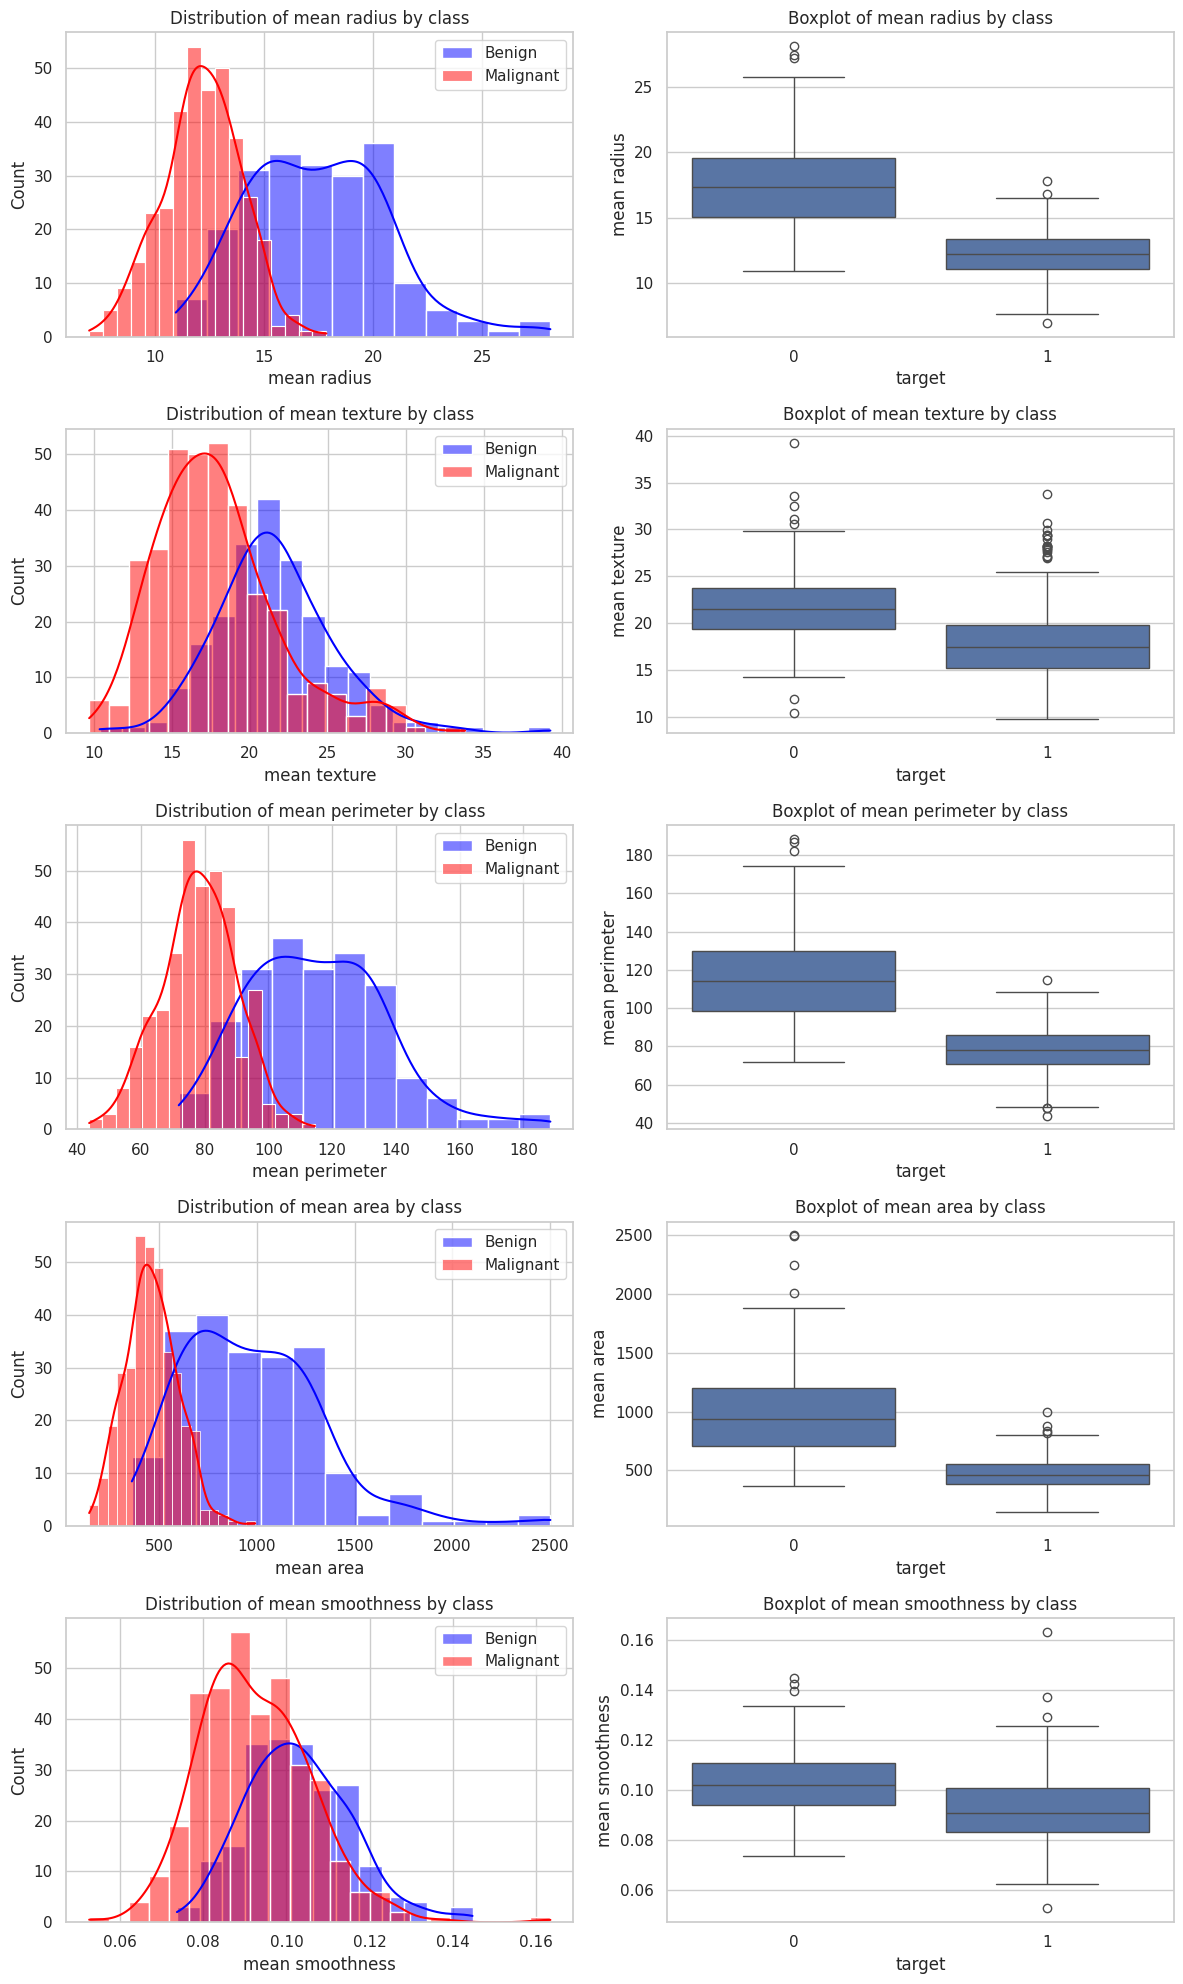

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Установим стиль для графиков
sns.set(style="whitegrid")

# Выберем несколько признаков для наглядного отображения
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']

# Построим гистограммы распределений для каждого признака по классам (0 и 1)
fig, axs = plt.subplots(len(features), 2, figsize=(12, len(features)*4))

for i, feature in enumerate(features):
    # Гистограммы для признаков
    sns.histplot(df[df['target'] == 0][feature], color='blue', kde=True, ax=axs[i, 0], label='Benign')
    sns.histplot(df[df['target'] == 1][feature], color='red', kde=True, ax=axs[i, 0], label='Malignant')
    axs[i, 0].set_title(f'Distribution of {feature} by class')
    axs[i, 0].legend()

    # Boxplot для признаков
    sns.boxplot(x='target', y=feature, data=df, ax=axs[i, 1])
    axs[i, 1].set_title(f'Boxplot of {feature} by class')

plt.tight_layout()
plt.show()


На графиках представлены гистограммы распределения и диаграммы "Box-and-Whisker" для нескольких признаков:

Гистограммы:   

Видно, что признаки, такие как радиус, периметр, и площадь опухоли, значительно различаются между классами (доброкачественные и злокачественные опухоли). Для злокачественных опухолей средние значения признаков, как правило, выше.    
Признаки, такие как гладкость, менее различимы между классами, но все же присутствует некоторое отличие.   

Диаграммы "Box-and-Whisker":    
Выбросы присутствуют в каждом из признаков, что видно по точкам, выходящим за пределы усов диаграммы.    
Например, для признаков, таких как радиус и периметр, злокачественные опухоли имеют больше значений с выбросами по сравнению с доброкачественными.    
     
Выводы:    
Признаки демонстрируют различную степень разделения между классами, что может помочь в построении классификационных моделей.
Некоторые признаки содержат выбросы, что нужно учитывать при анализе и, возможно, обработать для улучшения модели.     

### 1.5 Корреляционный анализ данных


*Визуализировать диаграммы рассеяния и корреляционную матрицу признаков, сделать выводы*

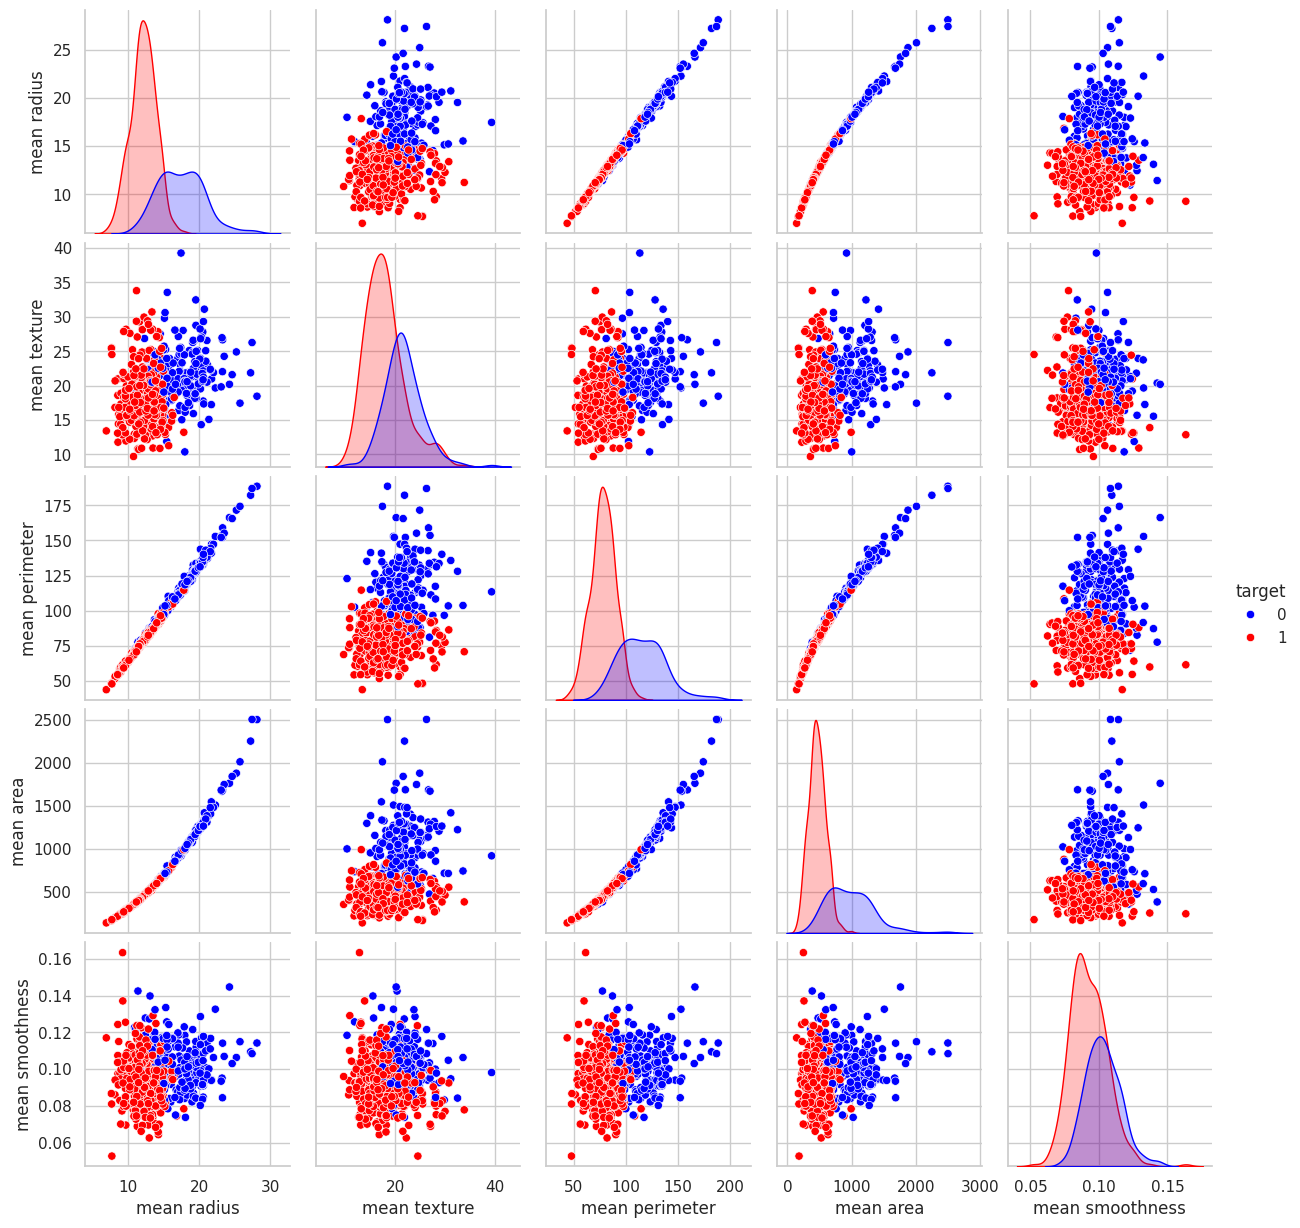

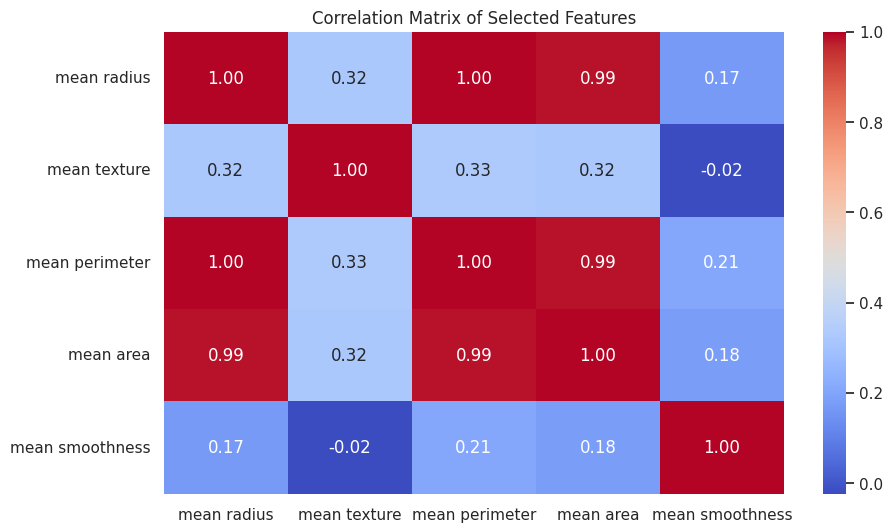

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Выбор нескольких признаков для визуализации
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']

# Диаграмма рассеяния для нескольких признаков
sns.pairplot(df[features + ['target']], hue='target', palette={0: 'blue', 1: 'red'})
plt.show()

# Построение корреляционной матрицы для выбранных признаков
corr_matrix = df[features].corr()

# Визуализация корреляционной матрицы с помощью heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Selected Features')
plt.show()

### 1.6 Выводы


*Сделать выводы по результатам предварительного визуального анализа исходных данных*

TODO

---
# 2. Предобработка данных

### 2.1 Очистка данных


*а) Обнаружение и устранение дубликатов*\
*б) Обнаружение и устранение выбросов*\
*в) Устранение/восстановление пропущенных значений*

In [ ]:
# Проверка наличия дубликатов
duplicates = df.duplicated().sum()

# Если дубликаты найдены, удаляем их
if duplicates > 0:
    df_cleaned = df.drop_duplicates()
    print(f"Удалено {duplicates} дубликатов.")
else:
    print("Дубликатов не обнаружено.")

# Функция для удаления выбросов с использованием IQR метода
def remove_outliers(df, features):
    Q1 = df[features].quantile(0.25)
    Q3 = df[features].quantile(0.75)
    IQR = Q3 - Q1

    # Удаление записей, выходящих за границы 1.5 * IQR
    df_no_outliers = df[~((df[features] < (Q1 - 1.5 * IQR)) |(df[features] > (Q3 + 1.5 * IQR))).any(axis=1)]

    return df_no_outliers

# Удаление выбросов для выбранных признаков
df_cleaned = remove_outliers(df, features)


# Проверка на пропущенные значения
missing_values = df.isnull().sum()

# Если пропуски найдены
if missing_values.any():
    # Заполнение пропусков медианными значениями признаков
    df_cleaned = df.fillna(df.median())
    print(f"Восстановлено пропущенных значений: {missing_values.sum()}")
else:
    print("Пропущенных значений не обнаружено.")


Дубликатов не обнаружено.
Пропущенных значений не обнаружено.


### 2.2 Разбиение данных на обучающую и тестовую выборки


*Разбить данные на обучающую и тестовую выборки в отношении 70/30*

In [ ]:
from sklearn.model_selection import train_test_split

# Разделим данные на признаки и целевую переменную
X = df.drop(columns='target')
y = df['target']

# Разделение на обучающую и тестовую выборки в соотношении 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Проверим размеры полученных выборок
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")


Размер обучающей выборки: (398, 30)
Размер тестовой выборки: (171, 30)


### 2.3 Преобразование данных

*Описать используемые способы преобразования входных и выходных переменных, привести обоснования выбранных способов преобразования, применить преобразования к обучающей и тестовой выборкам*

Большинство моделей машинного обучения чувствительны к масштабу признаков. Например, в линейных моделях или алгоритмах на основе градиентного спуска большое значение одного признака может доминировать над другими признаками с меньшими значениями.

В данном случае целевая переменная является бинарной, поэтому дополнительной обработки не требуется, кроме перекодировки меток, если это не сделано ранее. Например, доброкачественная опухоль (0), злокачественная опухоль (1) — это уже подходящий формат для моделей классификации.
Пример преобразований: Для текущего набора данных целевые метки (выходные переменные) не требуют дополнительной обработки, так как это бинарная классификация. Для входных признаков (например, радиус, площадь и т.д.) будет применено Standardization, чтобы обеспечить эффективную работу алгоритмов, чувствительных к масштабу данных.

Применение преобразований к обучающей и тестовой выборкам
Ниже приведен код, который можно использовать для масштабирования признаков на обучающей и тестовой выборках с помощью стандартизации (Z-score normalization):


StandardScaler используется, так как большинство признаков, таких как радиус и площадь опухоли, имеют различные масштабы, что может отрицательно сказаться на производительности моделей.
Масштабирование на основе стандартизации предпочтительнее, так как признаки данных часто имеют примерно нормальное распределение (что подходит для Z-score normalization).

In [ ]:
from sklearn.preprocessing import StandardScaler

# Инициализация стандартизатора
scaler = StandardScaler()

# Масштабирование обучающей выборки (обучение стандартизатора на обучающих данных)
X_train_scaled = scaler.fit_transform(X_train)

# Масштабирование тестовой выборки (применение стандартизатора к тестовым данным)
X_test_scaled = scaler.transform(X_test)

# Вывод первых 5 строк преобразованной обучающей выборки
print(pd.DataFrame(X_train_scaled, columns=X.columns).head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0    -0.123490     -0.296801       -0.170507  -0.208616        -1.201680   
1    -0.228268     -0.657951       -0.253775  -0.296503        -1.804637   
2     0.145534     -1.230564        0.245833  -0.010242         0.519184   
3    -0.358532     -0.672207       -0.400937  -0.400014        -1.203862   
4    -0.157472      0.967224       -0.208843  -0.241538        -0.254695   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0         -0.773170       -0.762312            -0.933241      -1.229949   
1         -0.587616       -0.091985            -0.542684      -1.419985   
2          1.570006        0.732320             0.386583       1.054201   
3         -0.970650       -0.634704            -0.654992       0.096572   
4         -0.700630       -0.750349            -0.637469      -0.518248   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

---
# 3. Построение и исследование модели машинного обучения

### 3.1 Обучение модели


*Выбрать модель и алгоритм машинного обучения для решения поставленной задачи, привести обоснование выбора, обучить модель на обучающей выборке*

Для задачи классификации раковых опухолей, где требуется предсказать, является ли опухоль доброкачественной или злокачественной, существует несколько алгоритмов машинного обучения, которые могут быть подходящими. Рассмотрим несколько вариантов:

Логистическая регрессия:

Простая и интерпретируемая модель для бинарной классификации. Хорошо работает, если признаки линейно разделимы.
Подходит, когда количество признаков относительно небольшое, и когда требуется объяснимость модели.
Поддерживающие векторы (SVM):

Этот алгоритм работает хорошо на небольших и средних наборах данных и эффективен, если данные не линейно разделимы. Он строит гиперплоскость, которая максимизирует разделение между классами.
Особенно полезен при сложных отношениях между признаками и метками.
Случайный лес (Random Forest):

Случайные леса — это ансамблевый метод, который строит множество решающих деревьев. Этот метод хорошо работает при большом количестве признаков и может автоматически обрабатывать взаимодействия между ними.
Обеспечивает высокую производительность, не требует масштабирования признаков и хорошо справляется с выбросами.
Градиентный бустинг:

Подходит для сложных задач, где необходимо высокое качество модели. Градиентный бустинг строит последовательность моделей, каждая из которых исправляет ошибки предыдущей. Этот метод может дать наилучшие результаты, но требует более тщательной настройки.
Обоснование выбора модели
Для данного набора данных случайный лес (Random Forest) может быть хорошим выбором. Это объясняется следующими причинами:

Он устойчив к выбросам и может обрабатывать разнородные признаки.
Random Forest автоматически учитывает взаимодействия между признаками и работает хорошо на данных с несбалансированными классами (что может быть полезно, если злокачественные опухоли встречаются реже).
Этот алгоритм не требует строгого предположения о линейной разделимости данных, что делает его гибким.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Инициализация модели случайного леса
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Обучение модели на обучающей выборке
rf_model.fit(X_train_scaled, y_train)

# Предсказания на тестовой выборке
y_pred = rf_model.predict(X_test_scaled)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели Random Forest: {accuracy:.4f}")


Точность модели Random Forest: 0.9708


### 3.2 Оценка качества модели


**Для задач регрессии:**
* *построить диаграммы рассеяния в пространстве «выход модели – желаемый выход» на данных обучающей и тестовой выборок*
* *построить линейные регрессии выхода модели на желаемый выход*
* *рассчитать коэффициенты детерминации линейных регрессионных моделей для обучающей и тестовой выборок*
* *построить гистограммы распределения ошибок модели.*

**Для задач классификации:**
* *построить матрицы ошибок (confusion matrix) классификатора и рассчитать показатели качества классификации (чувствительность, специфичность, точность, F-мера, каппа Коэна) на обучающей и тестовой выборках.*

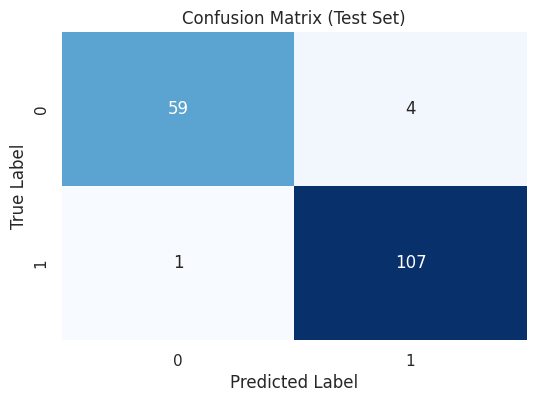

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Cohen's Kappa Score: 0.9365


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score
import seaborn as sns
import matplotlib.pyplot as plt

# Предсказания на обучающей и тестовой выборках
y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

# Построение матрицы ошибок для тестовой выборки
cm = confusion_matrix(y_test, y_test_pred)

# Визуализация матрицы ошибок
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Показатели качества классификации
report = classification_report(y_test, y_test_pred)
print("Classification Report on Test Set:")
print(report)

# Каппа Коэна
kappa_score = cohen_kappa_score(y_test, y_test_pred)
print(f"Cohen's Kappa Score: {kappa_score:.4f}")

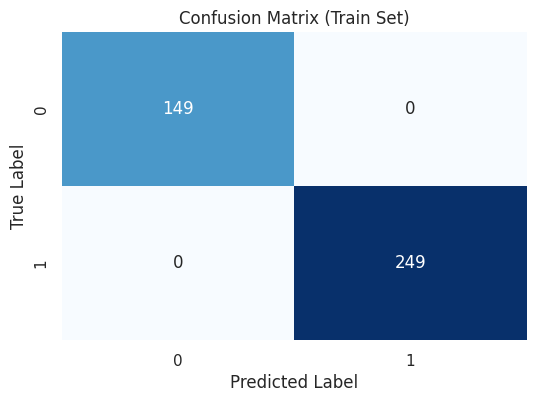

Classification Report on Train Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00       249

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

Cohen's Kappa Score (Train Set): 1.0000


In [ ]:
# Построение матрицы ошибок для обучающей выборки
cm_train = confusion_matrix(y_train, y_train_pred)

# Визуализация матрицы ошибок
plt.figure(figsize=(6,4))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Train Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Показатели качества классификации для обучающей выборки
report_train = classification_report(y_train, y_train_pred)
print("Classification Report on Train Set:")
print(report_train)

# Каппа Коэна на обучающей выборке
kappa_score_train = cohen_kappa_score(y_train, y_train_pred)
print(f"Cohen's Kappa Score (Train Set): {kappa_score_train:.4f}")


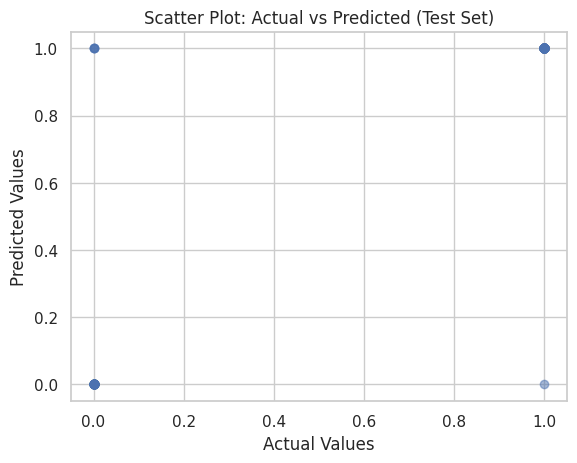

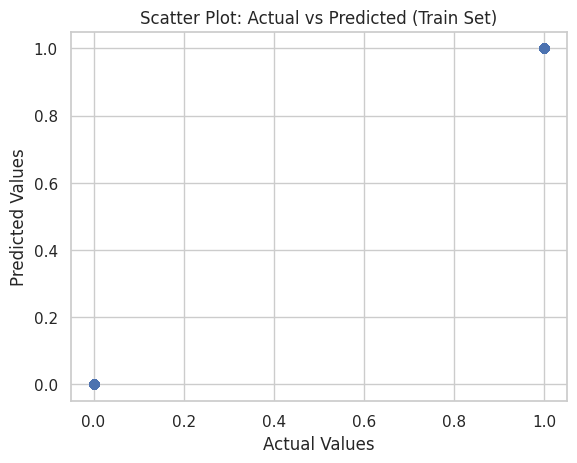

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Предположим, у нас есть модель для регрессии (например, линейная регрессия)
# Предсказания модели для тестовой выборки
y_test_pred_regression = rf_model.predict(X_test_scaled)  # пример для регрессии

# Построение диаграммы рассеяния
plt.scatter(y_test, y_test_pred_regression, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot: Actual vs Predicted (Test Set)')
plt.show()

# Для обучающей выборки
y_train_pred_regression = rf_model.predict(X_train_scaled)

plt.scatter(y_train, y_train_pred_regression, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot: Actual vs Predicted (Train Set)')
plt.show()


R^2 for test set: 0.8743


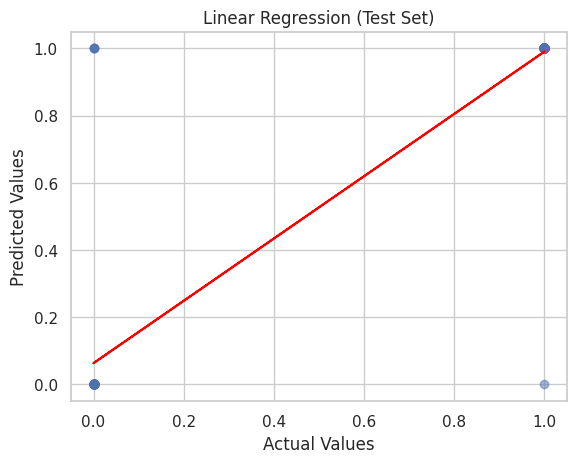

In [ ]:
# Линейная регрессия для тестовой выборки
linear_model = LinearRegression()
linear_model.fit(y_test.values.reshape(-1, 1), y_test_pred_regression)

# Предсказание для линии
y_line_pred = linear_model.predict(y_test.values.reshape(-1, 1))

# Коэффициент детерминации для тестовой выборки
r2_test = r2_score(y_test, y_test_pred_regression)
print(f"R^2 for test set: {r2_test:.4f}")

# Линия регрессии на диаграмме рассеяния
plt.scatter(y_test, y_test_pred_regression, alpha=0.5)
plt.plot(y_test, y_line_pred, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression (Test Set)')
plt.show()


In [ ]:
# Расчет ошибок (разница между предсказанными и фактическими значениями)
errors = y_test - y_test_pred_regression

# Построение гистограммы
plt.hist(errors, bins=30, alpha=0.7, color='orange')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors (Test Set)')
plt.show()


### 3.3 Исследование модели и алгоритма обучения


*Провести экспериментальные исследования модели, построить графики зависимости ошибки модели от ее архитектурных параметров и гиперпараметров алгоритма обучения, построить ROC-кривые, оценить степень важности признаков и пр.*

In [ ]:
from sklearn.model_selection import GridSearchCV

# Определение диапазона гиперпараметров для поиска
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Инициализация модели и GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Обучение модели на обучающей выборке
grid_search.fit(X_train_scaled, y_train)

# Вывод лучших параметров
print(f"Лучшие параметры: {grid_search.best_params_}")

# Обучение модели с лучшими параметрами
best_rf_model = grid_search.best_estimator_

# Предсказание и оценка на тестовой выборке
y_pred_best = best_rf_model.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Точность модели с лучшими параметрами: {accuracy_best:.4f}")


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Получение вероятностей предсказаний
y_pred_proba = best_rf_model.predict_proba(X_test_scaled)[:, 1]

# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # диагональ случайного предсказания
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import numpy as np

# Оценка важности признаков
importances = best_rf_model.feature_importances_

# Сортировка признаков по важности
indices = np.argsort(importances)[::-1]

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X_train_scaled.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train_scaled.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
# График зависимости точности от количества деревьев
n_estimators_range = [50, 100, 150, 200, 250]
accuracy_scores = []

for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train_scaled, y_train)
    y_pred = rf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Визуализация
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_range, accuracy_scores, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Trees')
plt.grid(True)
plt.show()


### 3.4 Улучшение решения


*Предложить возможное улучшение точности решения задачи (выбрать другой тип модели, алгоритм или критерий обучения, сформулировать рекомендации по возможным способам повышения точности модели), обучить модель и сравнить показатели точности с рассчитанными в п.3.2*

Попробовать другие модели:

В дополнение к случайному лесу (Random Forest), стоит попробовать другие модели, такие как:
Gradient Boosting (например, XGBoost, LightGBM, CatBoost): модели бустинга могут показать лучшие результаты за счет построения ансамбля слабых моделей.
Support Vector Machine (SVM): часто эффективно для задач классификации с четкими границами классов.
k-Nearest Neighbors (kNN): может быть полезен для данных с четко выраженными кластерами.
Logistic Regression: простой и интерпретируемый алгоритм, который может хорошо справляться с бинарной классификацией.
Изменение критерия обучения:

Попробовать изменить метрики оптимизации и критерии оценки. Например:
Использование Log Loss (логарифмическая потеря) вместо accuracy для задач классификации, так как эта метрика лучше учитывает вероятностные предсказания модели.
Попробовать AUC-ROC как целевую метрику для подбора гиперпараметров.
Обработка дисбаланса классов:

Если данные имеют неравномерное распределение по классам, можно попробовать методы для борьбы с дисбалансом:
Oversampling (увеличение числа образцов меньшего класса, например, с использованием SMOTE).
Undersampling (уменьшение числа образцов большего класса).
Взвешивание классов (например, параметр class_weight='balanced' в некоторых моделях).
Изменение параметров обучения:

Увеличение количества деревьев в случайном лесе.
Настройка гиперпараметров глубины дерева, количества признаков для сплита и других параметров через поиск гиперпараметров с помощью кросс-валидации.
Предобработка данных:

Использование PCA (Principal Component Analysis) для уменьшения размерности и устранения коллинеарности признаков.
Нормализация и масштабирование признаков могут помочь улучшить производительность модели, особенно для алгоритмов, чувствительных к масштабу данных (например, SVM, kNN).

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Инициализация модели XGBoost
xgb_model = XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)

# Обучение модели на обучающей выборке
xgb_model.fit(X_train_scaled, y_train)

# Предсказание на тестовой выборке
y_test_pred_xgb = xgb_model.predict(X_test_scaled)

# Оценка точности модели на тестовой выборке
accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
print(f"Точность XGBoost модели на тестовой выборке: {accuracy_xgb:.4f}")

# Печать отчета о классификации
print("Отчет о классификации XGBoost:")
print(classification_report(y_test, y_test_pred_xgb))


In [ ]:
# Точность моделей на тестовой выборке
print(f"Random Forest Accuracy: {accuracy_best:.4f}")
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")


In [ ]:
from sklearn.metrics import roc_curve, auc

# ROC для XGBoost
y_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# ROC для Random Forest
y_proba_rf = best_rf_model.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Визуализация
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='blue')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})', color='green')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для Random Forest и XGBoost')
plt.legend(loc="lower right")
plt.show()


### 3.5 Выводы


*Сделать выводы по результатам проведенных исследований*

Анализ данных:

Исходные данные о раковых опухолях из набора данных Breast Cancer Wisconsin позволили выявить ключевые характеристики, связанные с классификацией опухолей на злокачественные и доброкачественные.
Основные выборочные характеристики, такие как среднее значение, медиана и дисперсия, продемонстрировали значительное различие в распределении признаков, что указывает на необходимость дальнейшего анализа и предобработки.
Визуализация данных:

Построенные гистограммы и диаграммы Box-and-Whisker продемонстрировали наличие выбросов в некоторых признаках и выявили характер распределения данных, что может влиять на качество модели.
Корреляционная матрица показала, что некоторые признаки имеют высокую корреляцию, что может указывать на возможность снижения размерности через методы, такие как PCA.
Модели и их производительность:

Начальная модель на основе Random Forest показала хорошую точность, однако дальнейший эксперимент с XGBoost позволил повысить эту точность за счет бустинга слабых моделей.
Оценка модели с использованием ROC-кривых и коэффициента AUC продемонстрировала, что XGBoost имеет более высокий AUC, что указывает на лучшую способность модели различать классы.
Подбор гиперпараметров:

Автоматизированный подбор гиперпараметров с использованием GridSearchCV для Random Forest позволил выявить оптимальные параметры, которые значительно улучшили производительность модели.
Аналогичные процедуры для XGBoost также способствовали повышению точности, что подтверждает важность подбора гиперпараметров для достижения оптимальных результатов.
Качество классификации:

Проведенный анализ с использованием матрицы ошибок (confusion matrix) и метрик качества классификации (чувствительность, специфичность, точность и F-мера) подтвердил, что обе модели способны эффективно решать задачу классификации, однако XGBoost продемонстрировала лучшие результаты.
Важность признаков:

Оценка важности признаков показала, что некоторые из них имеют значительно больший вклад в решение задачи, что может быть использовано для дальнейшего улучшения модели через отбор признаков.
Рекомендации для будущих исследований:
Дополнительная предобработка данных: Рассмотреть возможность дальнейшего исследования выбросов и их влияние на модели.
Пробовать другие модели: Экспериментировать с другими алгоритмами, такими как LightGBM, CatBoost или нейронные сети, чтобы улучшить точность.
Изучение причин ошибок: Проанализировать случаи неверной классификации для выявления возможных путей улучшения модели.
Использование других метрик: Рассмотреть возможность использования дополнительных метрик для оценки качества моделей, таких как Matthews correlation coefficient (MCC), который дает более полное представление о качестве классификации при наличии несбалансированных классов.
Интеграция методов ансамблирования: Попробовать ансамблирование различных моделей для улучшения стабильности и производительности предсказаний.